In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

def f(x, y, z, regla):
    return regla & (1 << (x << 2 | y << 1 | z))


def ac1(regla=135, E0="azar", alto=100, ancho=100):
    fig = plt.figure(figsize=(alto/10,ancho/10))
    E = np.zeros((alto, ancho), dtype=np.bool_)
    if E0 == "central":
        E[0, int(ancho / 2)] = 1  # 1 central
    elif E0[0] in ['0','1']:
        ancho = len(E0)
        E = np.zeros((alto, ancho), dtype=np.bool_)
        for r in range(256):
            E[0, :] = np.array(list(E0))
    else:
        E[0, :] = np.round(np.random.rand(1, ancho))  # renglon aleatorio
    for i in range(1, alto):
        for j in range(1, ancho - 1):
            E[i, j] = f(E[i - 1, j - 1], E[i - 1, j], E[i - 1, j + 1], regla)
            E[i, 0] = f(E[i - 1, ancho - 1], E[i - 1, 0], E[i - 1, 1], regla) #ahorra un seg separar estos 2 casos
            E[i, ancho - 1] = f(E[i - 1, ancho - 2], E[i - 1, ancho - 1], E[i - 1, 0], regla)
    plt.imshow(E, cmap=cm.Blues)
    plt.show()

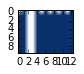

In [2]:
ac1(236,"0100101010101", alto=10)

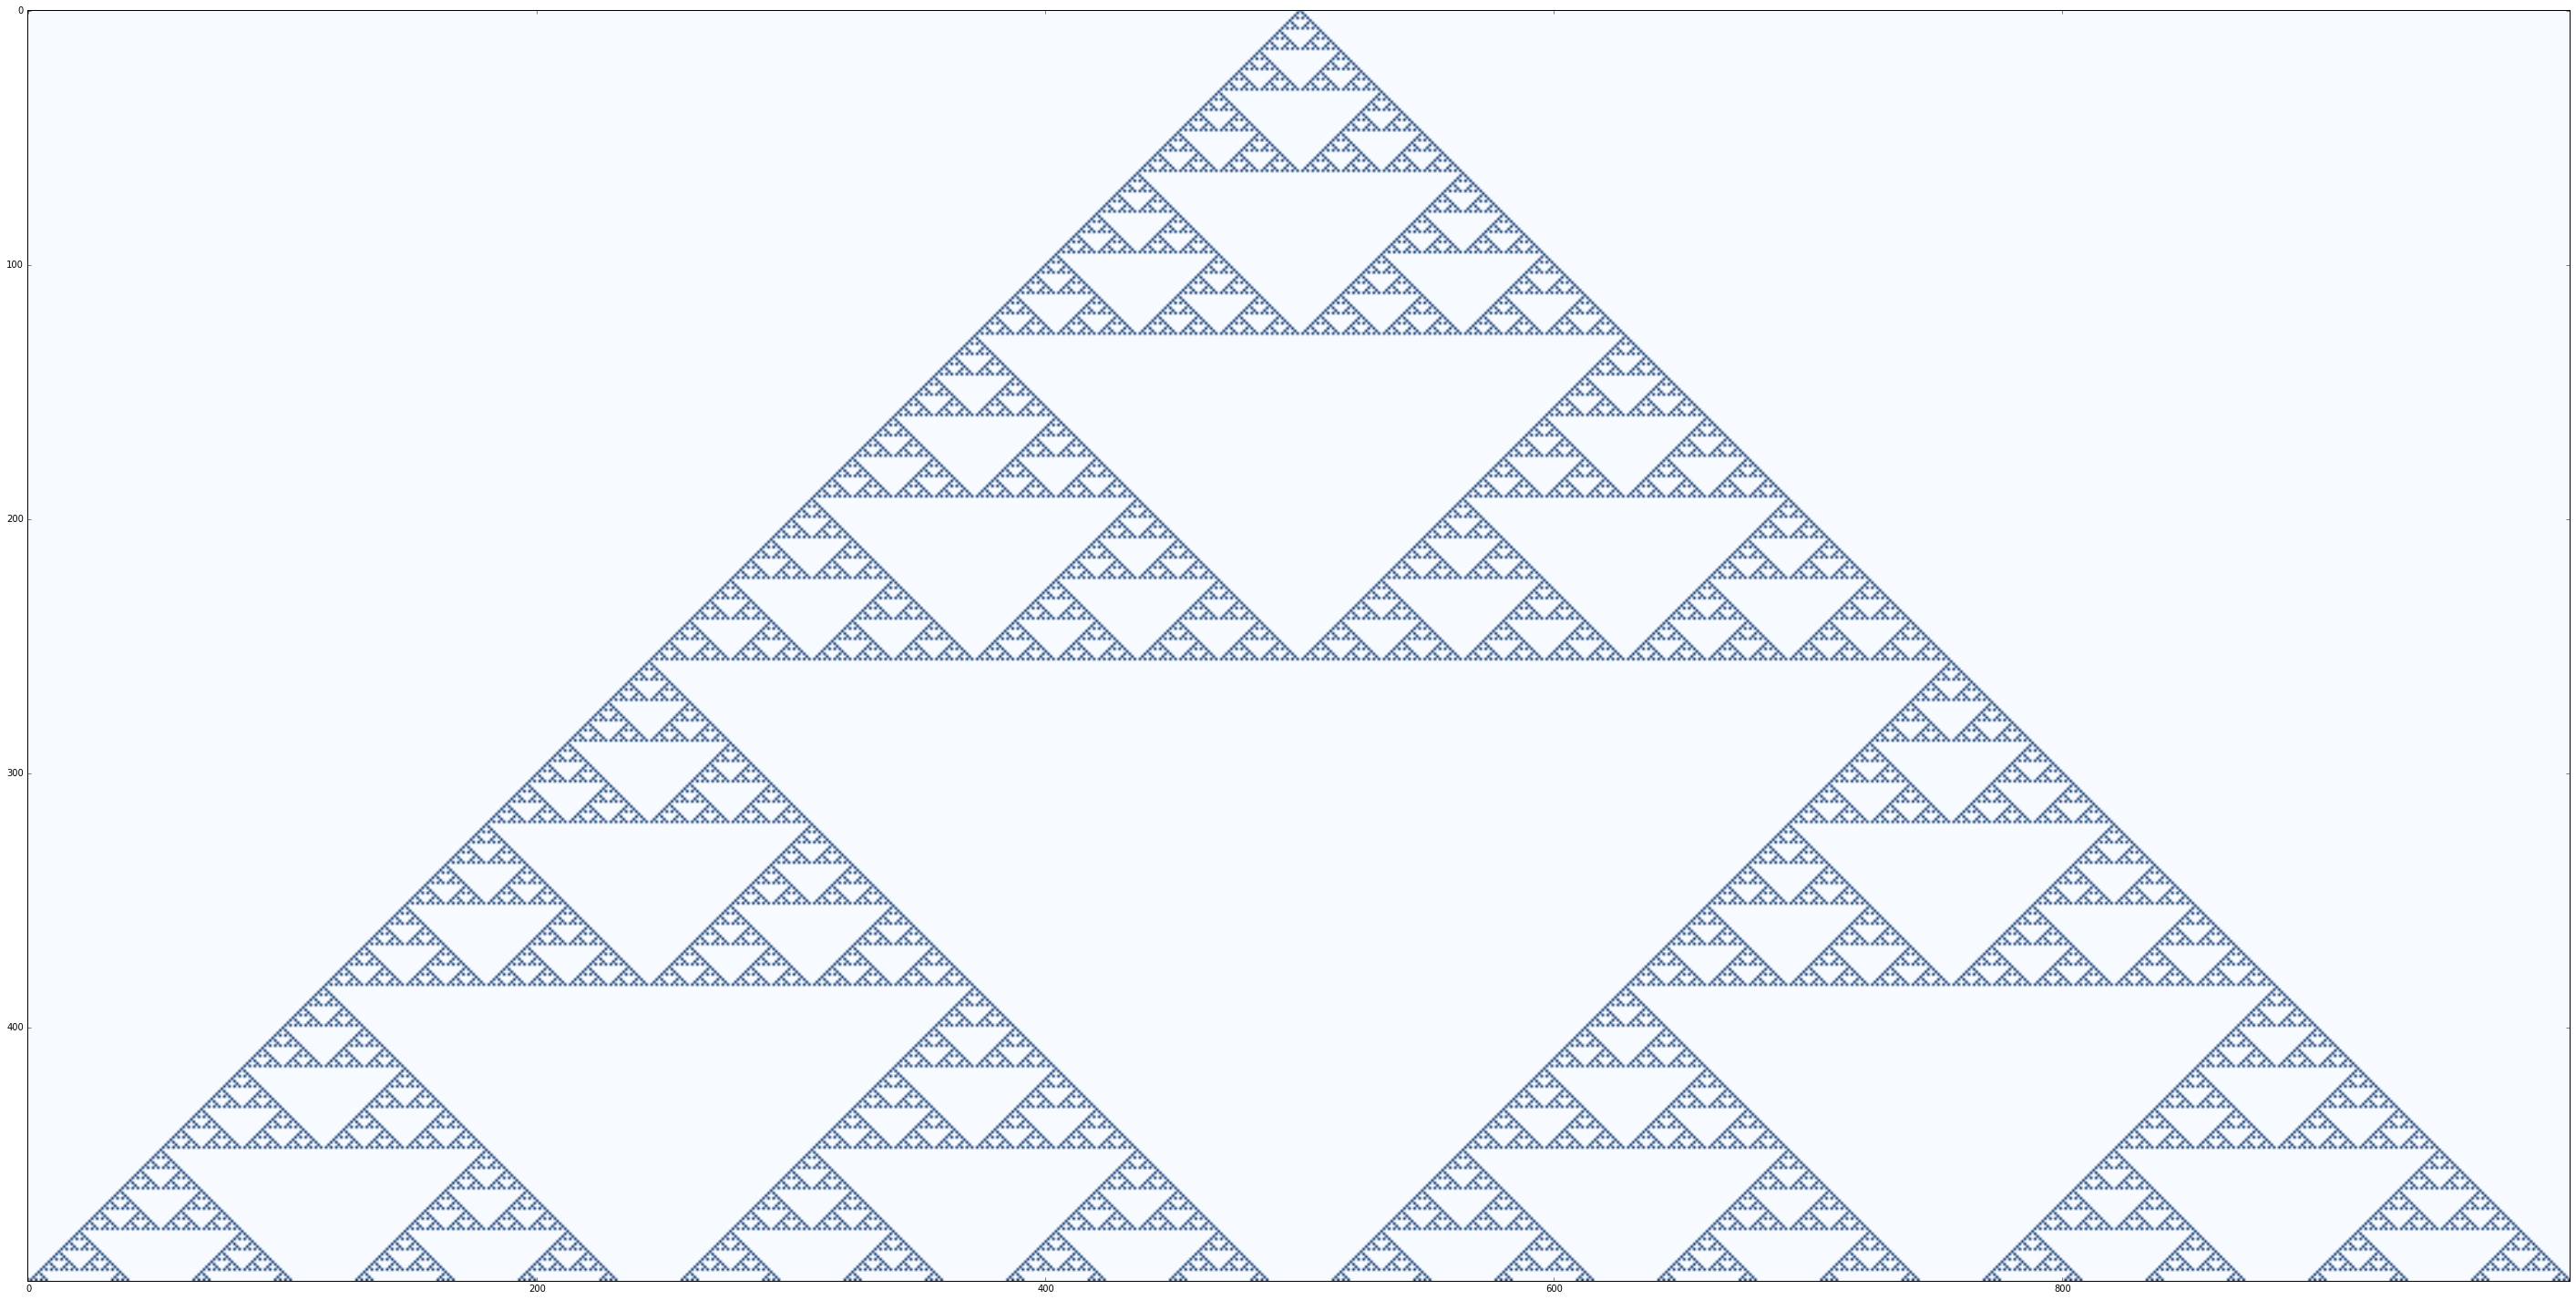

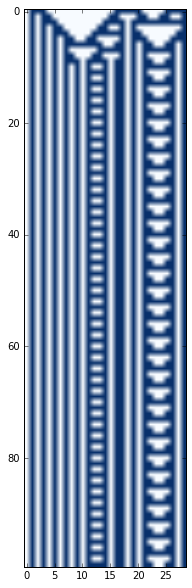

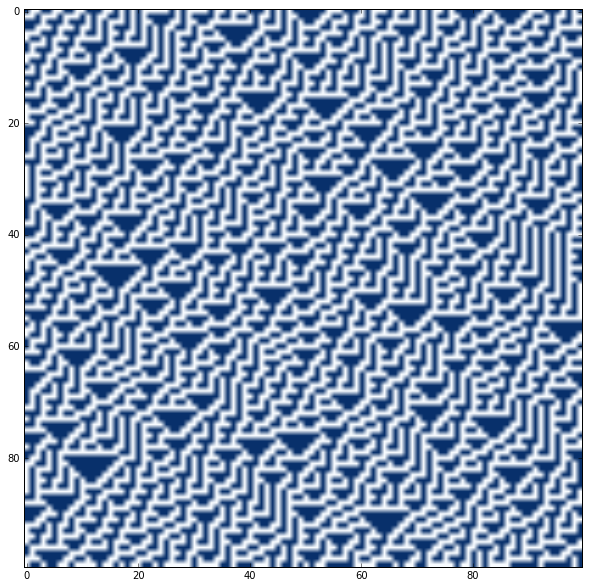

CPU times: user 14.6 s, sys: 113 ms, total: 14.7 s
Wall time: 14.7 s


In [11]:
#probar reglas 30,54,60,62,90,94,102,110,122,126,150,158,182,188,190,220,222,250
%time ac1(90, "central", alto=500, ancho=1000);ac1(94, "01110000000000001111100001111");ac1() # regla 135, E0 azar, 100x100

In [1]:
import numpy as np
a = np.random.randn(100)
b = a[25:75]
b

array([ 0.78015735,  0.57970319, -0.46610529, -0.36926046, -2.32395044,
       -0.0226604 ,  0.66758428, -1.69569364,  0.1449621 , -0.43669991,
        2.44445225,  0.57900215,  0.01918689, -0.63591318, -0.49742156,
        0.31369411, -2.41966995,  0.40840259, -1.26902547, -1.29455986,
        0.06705041, -0.09220175, -0.83958381, -0.93016685,  0.03090792,
        0.14634387, -0.20478138,  0.37849375,  0.82524811, -1.27912753,
        0.21497632, -1.39066834,  0.72708896,  0.69589254, -1.40021788,
       -0.77900926, -0.0663234 ,  0.42515902,  1.50930038, -0.72908501,
       -0.96674826,  0.08395821, -0.47677942, -0.20182042,  0.27320378,
        1.4631566 , -0.98851768, -0.79168377,  2.47531639, -0.95984049])

In [2]:
a[25] = 7
b

array([ 7.        ,  0.57970319, -0.46610529, -0.36926046, -2.32395044,
       -0.0226604 ,  0.66758428, -1.69569364,  0.1449621 , -0.43669991,
        2.44445225,  0.57900215,  0.01918689, -0.63591318, -0.49742156,
        0.31369411, -2.41966995,  0.40840259, -1.26902547, -1.29455986,
        0.06705041, -0.09220175, -0.83958381, -0.93016685,  0.03090792,
        0.14634387, -0.20478138,  0.37849375,  0.82524811, -1.27912753,
        0.21497632, -1.39066834,  0.72708896,  0.69589254, -1.40021788,
       -0.77900926, -0.0663234 ,  0.42515902,  1.50930038, -0.72908501,
       -0.96674826,  0.08395821, -0.47677942, -0.20182042,  0.27320378,
        1.4631566 , -0.98851768, -0.79168377,  2.47531639, -0.95984049])

In [4]:
c=a
a[26]=8
c

array([ 1.50723871, -0.29556755, -0.92680561, -0.34939713, -0.16768454,
       -0.33441021,  1.10335326, -1.32099544,  1.69249337, -1.13702307,
        1.26969185, -0.36153915, -0.22125988,  1.49583857, -0.30938327,
        0.76130659,  0.15849193,  0.31999211,  0.91685966,  0.14734291,
       -1.12309001,  0.75328598,  0.03545462, -0.74767229,  1.02729409,
        7.        ,  8.        , -0.46610529, -0.36926046, -2.32395044,
       -0.0226604 ,  0.66758428, -1.69569364,  0.1449621 , -0.43669991,
        2.44445225,  0.57900215,  0.01918689, -0.63591318, -0.49742156,
        0.31369411, -2.41966995,  0.40840259, -1.26902547, -1.29455986,
        0.06705041, -0.09220175, -0.83958381, -0.93016685,  0.03090792,
        0.14634387, -0.20478138,  0.37849375,  0.82524811, -1.27912753,
        0.21497632, -1.39066834,  0.72708896,  0.69589254, -1.40021788,
       -0.77900926, -0.0663234 ,  0.42515902,  1.50930038, -0.72908501,
       -0.96674826,  0.08395821, -0.47677942, -0.20182042,  0.27

In [5]:
d=a[:]
a[27]=9
d

array([ 1.50723871, -0.29556755, -0.92680561, -0.34939713, -0.16768454,
       -0.33441021,  1.10335326, -1.32099544,  1.69249337, -1.13702307,
        1.26969185, -0.36153915, -0.22125988,  1.49583857, -0.30938327,
        0.76130659,  0.15849193,  0.31999211,  0.91685966,  0.14734291,
       -1.12309001,  0.75328598,  0.03545462, -0.74767229,  1.02729409,
        7.        ,  8.        ,  9.        , -0.36926046, -2.32395044,
       -0.0226604 ,  0.66758428, -1.69569364,  0.1449621 , -0.43669991,
        2.44445225,  0.57900215,  0.01918689, -0.63591318, -0.49742156,
        0.31369411, -2.41966995,  0.40840259, -1.26902547, -1.29455986,
        0.06705041, -0.09220175, -0.83958381, -0.93016685,  0.03090792,
        0.14634387, -0.20478138,  0.37849375,  0.82524811, -1.27912753,
        0.21497632, -1.39066834,  0.72708896,  0.69589254, -1.40021788,
       -0.77900926, -0.0663234 ,  0.42515902,  1.50930038, -0.72908501,
       -0.96674826,  0.08395821, -0.47677942, -0.20182042,  0.27

In [6]:
e = a.copy()
a[28]=10
e

array([ 1.50723871, -0.29556755, -0.92680561, -0.34939713, -0.16768454,
       -0.33441021,  1.10335326, -1.32099544,  1.69249337, -1.13702307,
        1.26969185, -0.36153915, -0.22125988,  1.49583857, -0.30938327,
        0.76130659,  0.15849193,  0.31999211,  0.91685966,  0.14734291,
       -1.12309001,  0.75328598,  0.03545462, -0.74767229,  1.02729409,
        7.        ,  8.        ,  9.        , -0.36926046, -2.32395044,
       -0.0226604 ,  0.66758428, -1.69569364,  0.1449621 , -0.43669991,
        2.44445225,  0.57900215,  0.01918689, -0.63591318, -0.49742156,
        0.31369411, -2.41966995,  0.40840259, -1.26902547, -1.29455986,
        0.06705041, -0.09220175, -0.83958381, -0.93016685,  0.03090792,
        0.14634387, -0.20478138,  0.37849375,  0.82524811, -1.27912753,
        0.21497632, -1.39066834,  0.72708896,  0.69589254, -1.40021788,
       -0.77900926, -0.0663234 ,  0.42515902,  1.50930038, -0.72908501,
       -0.96674826,  0.08395821, -0.47677942, -0.20182042,  0.27

In [7]:
c

array([  1.50723871,  -0.29556755,  -0.92680561,  -0.34939713,
        -0.16768454,  -0.33441021,   1.10335326,  -1.32099544,
         1.69249337,  -1.13702307,   1.26969185,  -0.36153915,
        -0.22125988,   1.49583857,  -0.30938327,   0.76130659,
         0.15849193,   0.31999211,   0.91685966,   0.14734291,
        -1.12309001,   0.75328598,   0.03545462,  -0.74767229,
         1.02729409,   7.        ,   8.        ,   9.        ,
        10.        ,  -2.32395044,  -0.0226604 ,   0.66758428,
        -1.69569364,   0.1449621 ,  -0.43669991,   2.44445225,
         0.57900215,   0.01918689,  -0.63591318,  -0.49742156,
         0.31369411,  -2.41966995,   0.40840259,  -1.26902547,
        -1.29455986,   0.06705041,  -0.09220175,  -0.83958381,
        -0.93016685,   0.03090792,   0.14634387,  -0.20478138,
         0.37849375,   0.82524811,  -1.27912753,   0.21497632,
        -1.39066834,   0.72708896,   0.69589254,  -1.40021788,
        -0.77900926,  -0.0663234 ,   0.42515902,   1.50

In [14]:
m = np.arange(100)
m

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [15]:
ñ = m.reshape((10,10))
ñ

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [17]:
ñ[5,5] = 0
m

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54,  0, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [18]:
centro = ñ[3:8, 3:8]
centro

array([[33, 34, 35, 36, 37],
       [43, 44, 45, 46, 47],
       [53, 54,  0, 56, 57],
       [63, 64, 65, 66, 67],
       [73, 74, 75, 76, 77]])

In [19]:
centro[2, 2]=55
ñ

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [20]:
centro = np.zeros((5,5))
centro

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [21]:
ñ

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [22]:
centro = ñ[3:8, 3:8]
centro

array([[33, 34, 35, 36, 37],
       [43, 44, 45, 46, 47],
       [53, 54, 55, 56, 57],
       [63, 64, 65, 66, 67],
       [73, 74, 75, 76, 77]])

In [23]:
for ren in range(5):
    for col in range(5):
        centro[ren, col] = 0
centro, ñ

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]), array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32,  0,  0,  0,  0,  0, 38, 39],
        [40, 41, 42,  0,  0,  0,  0,  0, 48, 49],
        [50, 51, 52,  0,  0,  0,  0,  0, 58, 59],
        [60, 61, 62,  0,  0,  0,  0,  0, 68, 69],
        [70, 71, 72,  0,  0,  0,  0,  0, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]))

In [24]:
# centro =  ...     AGUAS!, en este momento centro deja de ser una vista de ñ
centro[:, :] = 1000
centro

array([[1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000],
       [1000, 1000, 1000, 1000, 1000]])

In [25]:
ñ

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9],
       [  10,   11,   12,   13,   14,   15,   16,   17,   18,   19],
       [  20,   21,   22,   23,   24,   25,   26,   27,   28,   29],
       [  30,   31,   32, 1000, 1000, 1000, 1000, 1000,   38,   39],
       [  40,   41,   42, 1000, 1000, 1000, 1000, 1000,   48,   49],
       [  50,   51,   52, 1000, 1000, 1000, 1000, 1000,   58,   59],
       [  60,   61,   62, 1000, 1000, 1000, 1000, 1000,   68,   69],
       [  70,   71,   72, 1000, 1000, 1000, 1000, 1000,   78,   79],
       [  80,   81,   82,   83,   84,   85,   86,   87,   88,   89],
       [  90,   91,   92,   93,   94,   95,   96,   97,   98,   99]])

In [26]:
a

array([  1.50723871,  -0.29556755,  -0.92680561,  -0.34939713,
        -0.16768454,  -0.33441021,   1.10335326,  -1.32099544,
         1.69249337,  -1.13702307,   1.26969185,  -0.36153915,
        -0.22125988,   1.49583857,  -0.30938327,   0.76130659,
         0.15849193,   0.31999211,   0.91685966,   0.14734291,
        -1.12309001,   0.75328598,   0.03545462,  -0.74767229,
         1.02729409,   7.        ,   8.        ,   9.        ,
        10.        ,  -2.32395044,  -0.0226604 ,   0.66758428,
        -1.69569364,   0.1449621 ,  -0.43669991,   2.44445225,
         0.57900215,   0.01918689,  -0.63591318,  -0.49742156,
         0.31369411,  -2.41966995,   0.40840259,  -1.26902547,
        -1.29455986,   0.06705041,  -0.09220175,  -0.83958381,
        -0.93016685,   0.03090792,   0.14634387,  -0.20478138,
         0.37849375,   0.82524811,  -1.27912753,   0.21497632,
        -1.39066834,   0.72708896,   0.69589254,  -1.40021788,
        -0.77900926,  -0.0663234 ,   0.42515902,   1.50

In [27]:
a[:]=7
a

array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.])

In [29]:
for a in range(10):
    for b in range(20):
        pass
    print(a)

0
1
2
3
4
5
6
7
8
9
